# I. Studying the international careers of actors

The goal of this part is to see whether actors tend to have more international careers. The final goal of this part is to plot a map of the world in which two countries are linked by an edge if an actor has played in those two countries. The size of the edges will depend on the number of actors.

This plot will allow us to see how the number of connections evolved and to look for the eventual emergence of clusters.

## 1. Analysis of the data on actors who have an international career

For this first analysis, we started by looking only at the single productions and excluding co-productions. 

It seems that co-productions are the initiatives of the productors and not of the actors. Therefore, they do not really reflect the movements of population associated with globalization. Indeed, if an american actor played in an americano-indian movie, it cannot really be considered as an international career. Moreover, one single co-production involves a lot of actors which might completely drawn the data from single productions.

In this process, we might loose informations about actors who participated in co-production that did not include their country of origin and otherwise never performed abroad. 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

In [65]:
# Creating a dataframe that contains only lines associated with single production movies

import sys
sys.path.append('../scripts')

from importlib import reload
import populationScripts as ps      # Import the function that processes the data for this study
reload(populationScripts)

df_single_prod = ps.createSingleProdDf()
df_single_prod.head()

c:\Users\richa\OneDrive\Documents\EPFL\MA1\ada\ada-2024-project-teamcsx24\src\analysisResearch\../scripts\populationScripts.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id,countries_freebase_id,number_production_countries
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26 00:00:00,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,['/m/09c7w0'],1
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15 00:00:00,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,['/m/09c7w0'],1
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15 00:00:00,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,['/m/09c7w0'],1
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12 00:00:00,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,['/m/09c7w0'],1
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25 00:00:00,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,['/m/09c7w0'],1


In [43]:
#comparison between the total number of movies and the number of co-productions
print(ps.comparisonSingleCoProd())
print(ps.comparisonActors())

('Number of single production : 112', 'Total number of movies production : 1867')
('Number of single production : 114291', 'Total number of movies production : 134384')


The number of movies resulting from single-production is quite small. However, it seems that our study still include the majority of the actors. 

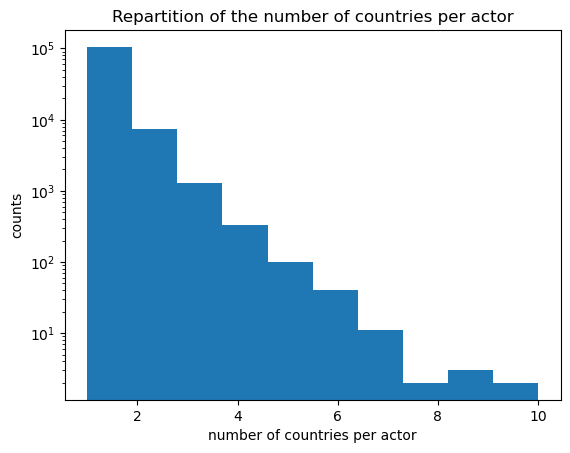

In [45]:
# Plot showing the number of countries in which actors have played

number_countries_per_actor = ps.numberCountriesPerActor()

#let's plot the result
plt.hist(number_countries_per_actor, log=True)
plt.xlabel('number of countries per actor')
plt.ylabel('counts')
plt.title('Repartition of the number of countries per actor')
plt.show()

In [44]:
# dataframe containing only the international actors
# statistics on the number of actors and the number of countries that will be involved in our final graph
df_international_actors = ps.createInternationalActorDf()
df_international_actors.head()

,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id,countries_freebase_id_x,number_production_countries,countries_freebase_id_y
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15 00:00:00,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,['/m/09c7w0'],1,2
1,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12 00:00:00,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,['/m/09c7w0'],1,2
2,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02 00:00:00,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m,['/m/09c7w0'],1,2
3,975900,/m/03vyhn,2001-08-24,McSimms,1944-07-22 00:00:00,M,1.800,NaN,Peter Jason,57.0,/m/0bgchxd,/m/0bgchxh,/m/03d663h,['/m/09c7w0'],1,2
4,975900,/m/03vyhn,2001-08-24,Benchley,1935-08-13 00:00:00,M,NaN,NaN,Doug McGrath,66.0,/m/0bgcj4p,/m/0bgcj4s,/m/02r5d3j,['/m/09c7w0'],1,2


In [52]:
# Computing the number of countries 
print(ps.numberCountries())

102 countries will be represented in our graph, 1867 were initially present in the data


Overall, the choice to focus on single-productions make us study a small part of the data. It would be interesting to compare those results with a similar study involving the co-productions to see if the small number if countries comes from the fact that most data was lost, or if it is just because a lot of countries do not have an international movie industry.

However, the data on single-productions is a good sample to test the faisibility of the graph.

## 2. Feasibility of the graph

The final goal of this part is to plot a map of the world in which two countries are linked by an edge if an actor has played in those two countries.

To study the feasibility of this goal, we used networkx to see if the realization of a graph with our data was feasible and relevant.

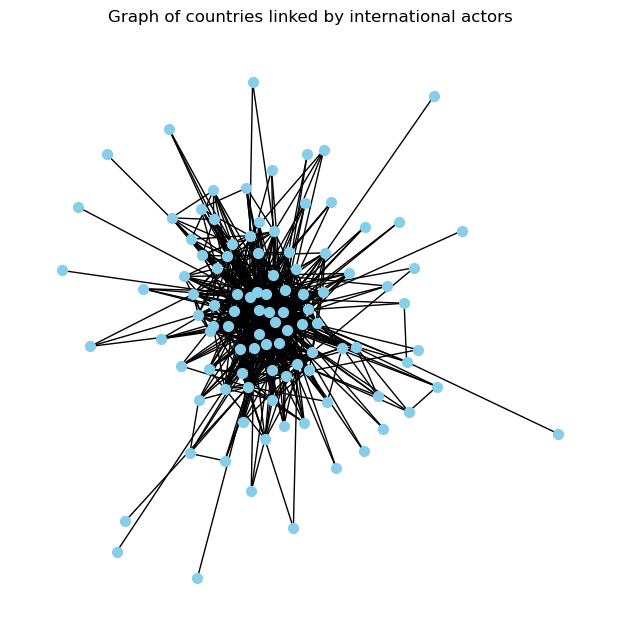

In [58]:
# first visualization as a graph
G = ps.getGraph()

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=False, node_color='skyblue', node_size=50, font_size=6, width = 1)
plt.title("Graph of countries linked by international actors")
plt.show()

Plotting a graph seems feasible. However several steps remain before obtaining the final version :

- Our first graph includes all the years. We should separate the data per year
- Making the plot interactive by allowing the user to change the date
- Adding the co-productions and comparing the results
- Using a dictionary to add the names of the countries
- Linking the countries with the ones from the geopanda library to plot the graph as a map

# II. Ethnicities analysis

## 1. Evolution of diversity

In this part we will check if the number of ethnicities in movies has indeed evolved.

In [ ]:
# Creating a dataset for the study
df_ethnicities = ps.createEthicitiesDf()
df_ethnicities.head()

,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id,release_year
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15 00:00:00,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15 00:00:00,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26 00:00:00,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2001
11,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09 00:00:00,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,2001
27,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10 00:00:00,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,2000


In [67]:
number_ethnicities = df_ethnicities['ethnicity_freebase_id'].nunique()
print(number_ethnicities)

477


Text(0.5, 1.0, 'Evolution of the number of ethnies per movie')

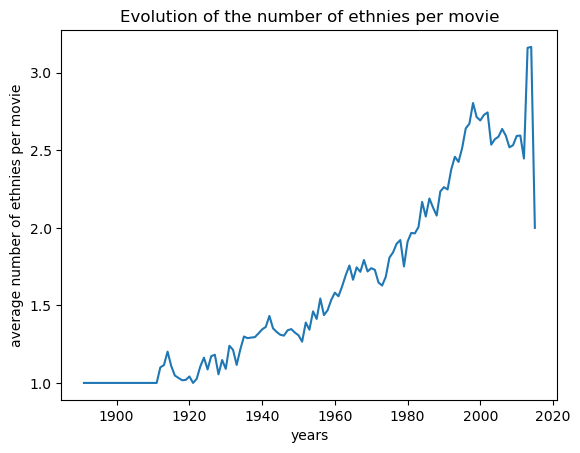

In [ ]:
# plot of the evolution of diversity in movies
average_ethnicity_per_year = ps.averageEthnicityPerYear() #the average is computed by grouping the ethnicity dataframe by year and by ethnicity

plt.plot(average_ethnicity_per_year.index, average_ethnicity_per_year.values)
plt.xlabel('years')
plt.ylabel('average number of ethnies per movie')
plt.title('Evolution of the number of ethnies per movie')

The number of ethnicities per movie is increasing. It is therefore relevant to study it.

## 2. Looking at the ethnicities in details

Our initial idea was to plot a stacked barchart to see the evolution of each category of ethnicies independently.
Since there are too many ethnicities for the plot to be understandable, we wanted to group the ethnicities by continent or region of origin in order to compare how different regions of the world are involved in the globalization of the movie industry.

However, linking each ethnicity with a continent, a region or even a country was not possible. Too much data was missing from the Freebase.

We tried to see if focusing only on the most represented ethnicities was relevant.

Text(0.5, 1.0, 'Representation of each ethnicity in the dataframe')

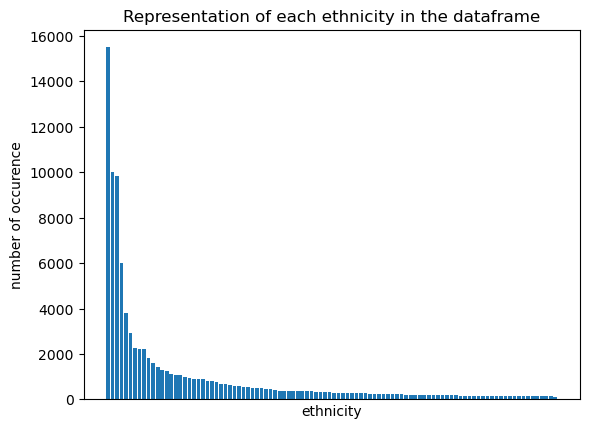

In [71]:
# plotting the repartition of each ethnicity in the dataframe
ethnicity_representation = df_ethnicities['ethnicity_freebase_id'].value_counts()[:100]
plt.bar(ethnicity_representation.index, ethnicity_representation.values)
plt.ylabel('number of occurence')
plt.xlabel('ethnicity')
plt.xticks([])
plt.xticks(rotation = 'vertical', fontsize = 5)
plt.title('Representation of each ethnicity in the dataframe')

As we can see on the previous plot, all ethnicities are not equally represented in the dataframe. Since we will be looking at proportions of each ethnicity in movies overtime, the less represented ethnicities will have a negligeable proportion. Therefore, it seems relevant to focus on the 15 most represented ethnicities.

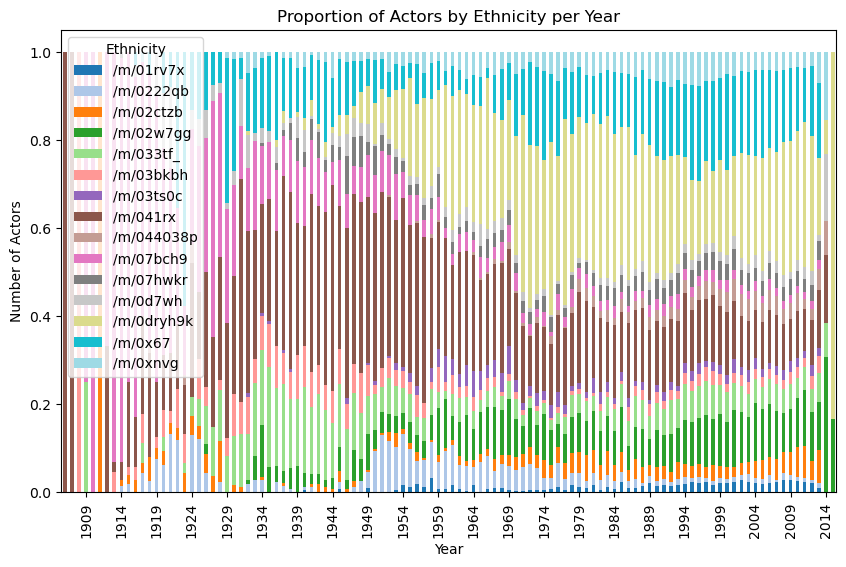

In [74]:
# plotting the evolution of the proportion of each ethnicity in movies overtime, for the 15 most representeed ethnicities
# list of the 10 most represented ethnicities
ten_main_ethnicities = df_ethnicities['ethnicity_freebase_id'].value_counts()[:15].index

# selecting the most represented ethnicities
main_ethnicities = df_ethnicities[df_ethnicities['ethnicity_freebase_id'].isin(ten_main_ethnicities)]
main_ethnicities_grouped = main_ethnicities.groupby(['release_year', 'ethnicity_freebase_id']).size().unstack(fill_value=0)

# Normalizing the data
main_ethnicities_normalized = main_ethnicities_grouped.div(main_ethnicities_grouped.sum(axis=1), axis=0)

main_ethnicities_normalized.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))

plt.xlabel('Year')
plt.xticks(np.arange(3,110,step = 5))
plt.ylabel('Number of Actors')
plt.title('Proportion of Actors by Ethnicity per Year')
plt.legend(title='Ethnicity')
plt.show()

As we can see on the previous plot, even with 15 ethnicities some ethnicities have very small areas on the stacked barchart. It seems relevant to focus only on those countries, since the other will barely be visible on the plots.